In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load dataset and create a dataframe
df = pd.read_csv('/content/Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
# check the columns
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [4]:
# Removing spaces before and after the column names
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
# View the number of rows
df.shape[0]

768

In [6]:
# View the number of columns
df.shape[1]

7

In [7]:
# Deatailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
# Check for missing values
print(df.isnull().sum())

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [9]:
# Drop rows with missing values
df = df.dropna()

In [10]:
# check missing values again
print(df.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


In [11]:
# Check for duplicates
print(df.duplicated().sum())

0


In [13]:
# Adding Day, Month, and Year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

# Importing Warnings library
import warnings

# Ignoring unwanted warnings
warnings.filterwarnings("ignore")

df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,29,February,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,31,March,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,30,April,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,31,May,2020


In [14]:
# Summary statistics
print(df.describe())

# Mean unemployment rate
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# Median unemployment rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployment rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')

                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        7.400000e+02                               740.000000   
mean         7.204460e+06                                42.630122   
min          4.942000e+04                                13.330000   
25%          1.190404e+06                                38.06

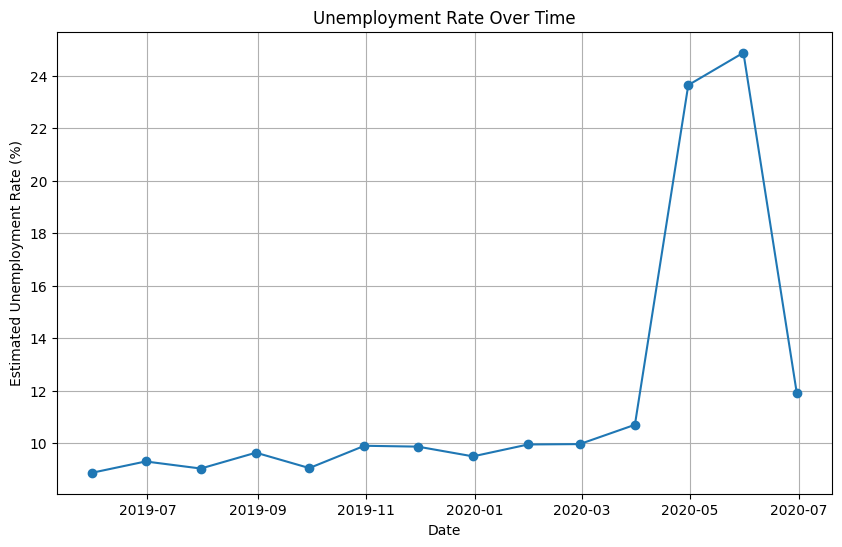

In [15]:
import matplotlib.pyplot as plt

# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

In [16]:
# Bar Plot of Average Estimated Unployment Rate
fig = px.bar(df, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Region", title = "Estimated Unemploment Rate by Region")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [17]:
# Bar Plot of Estimated Employed people in every month
fig = px.bar(df, x = 'Month', y = 'Estimated Employed', color = 'Month', title = 'Estimated Employed People')
fig.show()

In [18]:
Region_list = df['Region'].tolist()

Region_dict = {}
Region_counter = 1
for Region in Region_list:
  if pd.notnull(Region):
    if Region not in Region_dict:
      Region_dict[Region] = Region_counter
      Region_counter += 1
print(Region_dict)
df['Region'] = df['Region'].replace(Region_dict)
df['Region']

{'Andhra Pradesh': 1, 'Assam': 2, 'Bihar': 3, 'Chhattisgarh': 4, 'Delhi': 5, 'Goa': 6, 'Gujarat': 7, 'Haryana': 8, 'Himachal Pradesh': 9, 'Jammu & Kashmir': 10, 'Jharkhand': 11, 'Karnataka': 12, 'Kerala': 13, 'Madhya Pradesh': 14, 'Maharashtra': 15, 'Meghalaya': 16, 'Odisha': 17, 'Puducherry': 18, 'Punjab': 19, 'Rajasthan': 20, 'Sikkim': 21, 'Tamil Nadu': 22, 'Telangana': 23, 'Tripura': 24, 'Uttar Pradesh': 25, 'Uttarakhand': 26, 'West Bengal': 27, 'Chandigarh': 28}


0       1
1       1
2       1
3       1
4       1
       ..
749    27
750    27
751    27
752    27
753    27
Name: Region, Length: 740, dtype: int64

In [19]:
Date_list = df['Date'].tolist()

Date_dict = {}
Date_counter = 1
for Date in Date_list:
  if pd.notnull(Date):
    if Date not in Date_dict:
      Date_dict[Date] = Date_counter
      Date_counter += 1
print(Date_dict)
df['Date'] = df['Date'].replace(Date_dict)
df['Date']

{Timestamp('2019-05-31 00:00:00'): 1, Timestamp('2019-06-30 00:00:00'): 2, Timestamp('2019-07-31 00:00:00'): 3, Timestamp('2019-08-31 00:00:00'): 4, Timestamp('2019-09-30 00:00:00'): 5, Timestamp('2019-10-31 00:00:00'): 6, Timestamp('2019-11-30 00:00:00'): 7, Timestamp('2019-12-31 00:00:00'): 8, Timestamp('2020-01-31 00:00:00'): 9, Timestamp('2020-02-29 00:00:00'): 10, Timestamp('2020-03-31 00:00:00'): 11, Timestamp('2020-04-30 00:00:00'): 12, Timestamp('2020-05-31 00:00:00'): 13, Timestamp('2020-06-30 00:00:00'): 14}


0       1
1       2
2       3
3       4
4       5
       ..
749    10
750    11
751    12
752    13
753    14
Name: Date, Length: 740, dtype: int64

In [20]:
Frequency_list = df['Frequency'].tolist()

Frequency_dict = {}
Frequency_counter = 1
for Frequency in Frequency_list:
  if pd.notnull(Frequency):
    if Frequency not in Frequency_dict:
      Frequency_dict[Frequency] = Frequency_counter
      Frequency_counter += 1
print(Frequency_dict)
df['Frequency'] = df['Frequency'].replace(Frequency_dict)
df['Frequency']

{' Monthly': 1, 'Monthly': 2}


0      1
1      1
2      1
3      1
4      1
      ..
749    2
750    2
751    2
752    2
753    2
Name: Frequency, Length: 740, dtype: int64

In [21]:
Area_list = df['Area'].tolist()

Area_dict = {}
Area_counter = 1
for Area in Area_list:
  if pd.notnull(Area):
    if Area not in Area_dict:
      Area_dict[Area] = Area_counter
      Area_counter += 1
print(Area_dict)
df['Area'] = df['Area'].replace(Area_dict)
df['Area']

{'Rural': 1, 'Urban': 2}


0      1
1      1
2      1
3      1
4      1
      ..
749    2
750    2
751    2
752    2
753    2
Name: Area, Length: 740, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
# Split the dataset into features and target variable
X = df[['Region', 'Date', 'Frequency', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']]
y = df['Estimated Unemployment Rate (%)']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3.7610081081081073


In [28]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 54.40126542108107


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2*100}')

R-squared: 62.42428059525459
